In [1]:
import pandas as pd

In [22]:
# tissue = 'brain' # or pbmc
tissue = "pbmc"
path_to_melted_df = f"/space/grp/aadrian/Pseudobulk_Function_Pipeline_HighRes/bin/bulkSimulations/data/boostrapped/1/EGAD/melted_dfs/{tissue}_sc_with_metadata_cpm_pc.h5ad_melted_df.csv.gz"
path_to_curated_gos = "/space/grp/aadrian/Pseudobulk_Function_Pipeline_HighRes/bin/preprocessing/preprocessGO_pipe/data/bp_curated_annotations.tsv"

In [23]:
df_brain_melted = pd.read_csv(path_to_melted_df, index_col = 0)

In [24]:
df_brain_melted

,index,tissue,variance,auc
0,GO:0000045,pbmc_sc_with_metadata_cpm_pc.h5ad,0.01,0.572421
1,GO:0000070,pbmc_sc_with_metadata_cpm_pc.h5ad,0.01,0.638011
2,GO:0000077,pbmc_sc_with_metadata_cpm_pc.h5ad,0.01,0.525249
3,GO:0000079,pbmc_sc_with_metadata_cpm_pc.h5ad,0.01,0.562212
4,GO:0000082,pbmc_sc_with_metadata_cpm_pc.h5ad,0.01,0.516878
...,...,...,...,...
5603,GO:2001237,pbmc_sc_with_metadata_cpm_pc.h5ad,0.00,0.509704
5604,GO:2001238,pbmc_sc_with_metadata_cpm_pc.h5ad,0.00,0.575212
5605,GO:2001240,pbmc_sc_with_metadata_cpm_pc.h5ad,0.00,0.596038
5606,GO:2001243,pbmc_sc_with_metadata_cpm_pc.h5ad,0.00,0.544872


In [25]:
curated_gos = pd.read_csv(path_to_curated_gos, sep = "\t")
curated_gos.fillna("F", inplace=True)

In [26]:
def combine_bootstraps_to_avg(melted_df:pd.DataFrame) -> pd.DataFrame:
    """Combine the performance of GO terms across bootstraps

    Args:
        melted_df (pd.DataFrame): df of data for aucs across many bootstraps
    """
    avg_performance = melted_df.groupby('index').mean()
    avg_performance = avg_performance['auc']
    return avg_performance
    

In [27]:
def combine_with_go_metadata(df_auc_performance:pd.DataFrame, go_cta_df:pd.DataFrame)-> pd.DataFrame:
    """Combine the GO metadata to our gene information

    Args:
        df_auc_performance (_type_): performance of go terms
        go_cta (_type_): cell type affiliation of go curations

    Returns:
        pd.DataFrame: _description_
    """
    
    merged_data = pd.merge(df_auc_performance, go_cta_df, how = 'left', left_on='index', right_on='id')
    return merged_data

brain_annotations = combine_with_go_metadata(df_auc_performance=df_brain_melted,
                                             go_cta_df=curated_gos)
brain_annotations.head()

,index,tissue,variance,auc,id,name,namespace,CTAffiliated,BrainAffiliated,PBMCAffiliated,def
0,GO:0000045,pbmc_sc_with_metadata_cpm_pc.h5ad,0.01,0.572421,GO:0000045,autophagosome assembly,biological_process,F,F,F,The formation of a double membrane-bounded str...
1,GO:0000070,pbmc_sc_with_metadata_cpm_pc.h5ad,0.01,0.638011,GO:0000070,mitotic sister chromatid segregation,biological_process,F,F,F,The cell cycle process in which replicated hom...
2,GO:0000077,pbmc_sc_with_metadata_cpm_pc.h5ad,0.01,0.525249,GO:0000077,DNA damage checkpoint signaling,biological_process,F,F,F,A signal transduction process that contributes...
3,GO:0000079,pbmc_sc_with_metadata_cpm_pc.h5ad,0.01,0.562212,GO:0000079,regulation of cyclin-dependent protein serine/...,biological_process,F,F,F,"Any process that modulates the frequency, rate..."
4,GO:0000082,pbmc_sc_with_metadata_cpm_pc.h5ad,0.01,0.516878,GO:0000082,G1/S transition of mitotic cell cycle,biological_process,F,F,F,The mitotic cell cycle transition by which a c...


In [28]:
melted_df = brain_annotations.melt(id_vars=['id', 'auc', 'variance'],
                                   value_vars=['CTAffiliated', 'BrainAffiliated', 'PBMCAffiliated'])
melted_df.head()

,id,auc,variance,variable,value
0,GO:0000045,0.572421,0.01,CTAffiliated,F
1,GO:0000070,0.638011,0.01,CTAffiliated,F
2,GO:0000077,0.525249,0.01,CTAffiliated,F
3,GO:0000079,0.562212,0.01,CTAffiliated,F
4,GO:0000082,0.516878,0.01,CTAffiliated,F


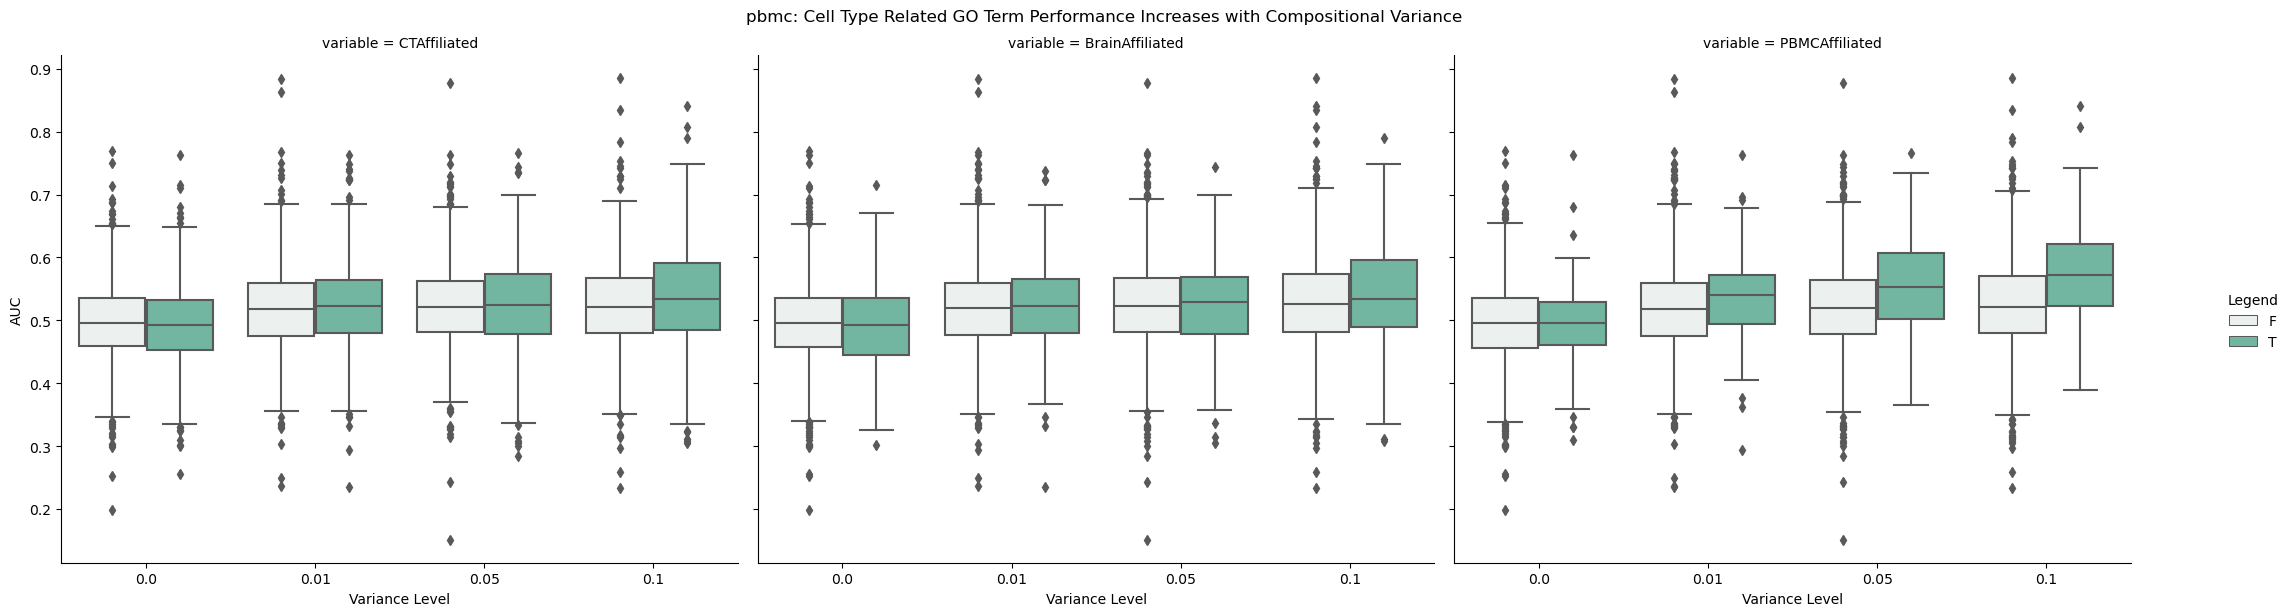

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named melted_df
# containing columns 'variance', 'auc', 'variable', 'value'

# Set a different color palette (e.g., 'Set2')
sns.set_palette('Set2')

# Use Seaborn to create a faceted boxplot separated by color
g = sns.FacetGrid(melted_df, col='variable', height=6, aspect=1.2)
g.map_dataframe(sns.boxplot, x='variance', y='auc', hue='value', dodge=True)

# Set labels and title
g.set_axis_labels('Variance Level', 'AUC')
g.fig.suptitle(f'{tissue}: Cell Type Related GO Term Performance Increases with Compositional Variance', y=1.02)

# Add legend outside the plot
g.add_legend(title='Legend', bbox_to_anchor=(1, 0.5), loc='center left')

# Show the plot
plt.show()


In [58]:
import pandas as pd

In [87]:
import anndata as ad
import pandas as pd
df = pd.read_csv("/space/grp/aadrian/Pseudobulk_Function_Pipeline_HighRes/bin/bulkSimulations/data/bootd/1/simulated_bulk_datasets/brain_sc_with_metadata_cpm_pc/var_0.01_brain_sc_with_metadata_cpm_pc_simulated_bulk_samples.csv.gz")
adata = ad.read_h5ad("/space/grp/aadrian/Pseudobulk_Function_Pipeline_HighRes/bin/preprocessing/preprocessSC_pipe/data/h5ad_datasets/processed/withStats/pbmc_sc_with_metadata_cpm_pc_stats.h5ad")


In [88]:
adata.obs.loc[:,'Cell type'].unique()

['Macrophages', 'T-cells', 'Monocytes', 'Nk-cells', 'Platelets', 'Dendritic cells', 'B-cells']
Categories (7, object): ['B-cells', 'Dendritic cells', 'Macrophages', 'Monocytes', 'Nk-cells', 'Platelets', 'T-cells']

In [76]:
df2 = pd.read_csv("/space/grp/aadrian/Pseudobulk_Function_Pipeline_HighRes/bin/bulkSimulations/data/bootd/2/simulated_bulk_datasets/brain_sc_with_metadata_cpm_pc/var_0.01_brain_sc_with_metadata_cpm_pc_simulated_bulk_samples.csv.gz")



1000000.8119999999